Лосев Владислав, Фн12-31м

In [1]:
#pip install PyWavelets

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pywt
import cv2
import numpy as np
def fuseCoeff(coef1, coef2, method) :

    if (method == 'mean') :
        coef = (coef1 + coef2) / 2
    elif (method == 'min'):
        coef = np.minimum (coef1, coef2)
    elif (method == 'max'):
        coef = np.maximum (coef1, coef2)
    else:

        coef = []

    return coef

Функция для визуализации изображений


In [4]:
def visual(text='Результат после слияния',image_path='fused_image.jpg'):
    image = cv2.imread(image_path)
    if image is None:
        print("Не удалось загрузить изображение.")
    else:
        pass
  
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')  
    plt.title(text)
    plt.show()

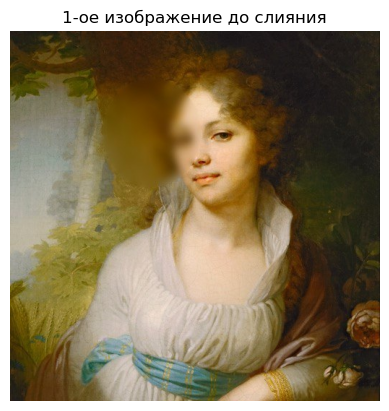

In [5]:
visual('1-ое изображение до слияния','ex1.jpg')

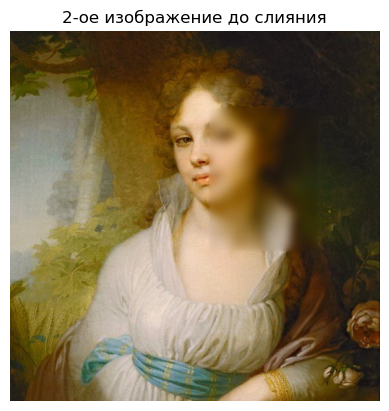

In [6]:
visual('2-ое изображение до слияния','ex2.jpg')

In [7]:
def colored_wavelet_fusion(color=0,FUSION_METHOD='mean',wavelet= 'haar',p1='ex1.jpg',p2='ex2.jpg'):
    I1 = cv2.imread (p1, cv2. IMREAD_COLOR)
    I2 = cv2.imread (p2, cv2. IMREAD_COLOR)
    I1=I1[:,:,color]
    I2=I2[:,:,color]
    I2 = cv2.resize (I2, I1.shape)

    
    coef1 = pywt.wavedec2 (I1, wavelet)
    coef2 = pywt.wavedec2 (I2, wavelet)
    fusedCoef = []
    for i in range (len(coef1)):
        if (i== 0):
            fusedCoef. append (fuseCoeff (coef1[0], coef2 [0],FUSION_METHOD) )
        else:
            c1 = fuseCoeff (coef1[i][0],coef2[i][0],FUSION_METHOD)
            c2 = fuseCoeff (coef1[i][1], coef2[i][1], FUSION_METHOD)
            c3 = fuseCoeff (coef1[i][2], coef2[i][2], FUSION_METHOD)

            fusedCoef.append ((c1, c2, c3) )
        
    fusedImage = pywt.waverec2(fusedCoef,wavelet)
    fusedImage = np.multiply(np.divide(fusedImage - np.min(fusedImage), (np.max(fusedImage) - np.min(fusedImage) )) ,255)
    fusedImage = fusedImage.astype (np.uint8)  
    return fusedImage

Выполним слияние с помощью вейвлет-разложения для каждого из каналов

In [8]:
fusedImage1=colored_wavelet_fusion(color=0)
fusedImage2=colored_wavelet_fusion(color=1)
fusedImage3=colored_wavelet_fusion(color=2)

Сохраним полученный результат

In [9]:
cv2.imwrite("fused_image.jpg", cv2.merge((fusedImage1, fusedImage2, fusedImage3)))

True

После слияния получаем:

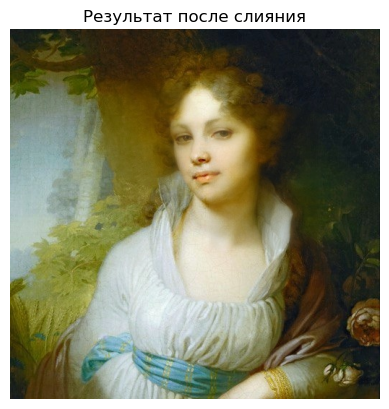

In [10]:
visual()